#Mid-term Take Home Assignment

TEAM 05 : CHERIL YOGI, BHAWANA AGARWAL, TRIPTI GUPTA 

# Objective
We have two datasets:
one containing happy and sad faces, 
and another featuring male and female faces.  

The objective is to create a consolidated model capable of training and predicting whether an image falls into one of four distinct categories: `HappyMale`, `HappyFemale`, `SadMale`, or `SadFemale`. 

# Dataset

1. `Happy-sad` : The dataset is stored in an h5 file format, comprising approximately 600 images. Each image is associated with a label denoting either happiness or sadness, with the label "0" indicating sadness and "1" indicating happiness.

2. `Male-female` : The dataset consists of more than 58,000 images categorized into training and validation folders, representing both male and female subjects. The labels are assigned as "0" for female and "1" for male.

The primary challenge we encountered was the substantial difference in data size between the two aforementioned datasets. Our initial approaches were as follows:

1. Initially, we considered training both datasets separately by constructing two distinct models. Subsequently, we aimed to combine the output of these models and input it into a new unified model for predicting validation male-female images. However, the significant size difference between the datasets posed challenges, potentially leading to issues such as overfitting or biased predictions.
2. As a second approach, we contemplated training the male-female model first, leveraging its larger dataset for improved accuracy. This pretrained model would then be applied to the happy-sad dataset, creating a pseudo dataset encompassing all four labels. Unfortunately, this method proved less effective due to the biased nature of the happy-sad dataset, which only included male images, resulting in suboptimal performance for female emotions.
3. Consequently, in our final approach, we utilized the transfer learning technique by initially training the emotion model independently. Subsequently, we employed this emotion model as a pretrained model for the male-female dataset. This approach aims to leverage the strength of the emotion model while addressing the bias present in the happy-sad dataset, ultimately contributing to the development of a more effective unified model.

In [9]:
# Importing necessary libraries 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
import h5py
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.image import resize

# Emotions Dataset

In the code below we are providing the path for the happy-sad dataset and performing the following steps:  

Reading Happy Sad Training Data from HDF5 File. 
Then iterating over keys and values of the HDF5 file for happy sad dataset.
Listing the classes from the happy-sad dataset

In [10]:
happy_dataset_dir = '/Users/cherilyogi/Desktop/Class_Folder/INFO_6106/Homework_8/happy' #replace this path with your path
train_happy_path = os.path.join(happy_dataset_dir, 'train_happy.h5')
test_happy_path = os.path.join(happy_dataset_dir, 'test_happy.h5')
file = h5py.File(train_happy_path, 'r')
for key, val in file.items():
    print(key,'and' ,val)

list_classes and <HDF5 dataset "list_classes": shape (2,), type "<i8">
train_set_x and <HDF5 dataset "train_set_x": shape (600, 64, 64, 3), type "|u1">
train_set_y and <HDF5 dataset "train_set_y": shape (600,), type "<i8">


In [11]:
#In this step, the data for 'train_set_x' is extracted from the HDF5 file for training
list_classes = file['list_classes'][:]
print(list_classes)

[0 1]


In [12]:
#In this step, the data for 'train_set_y' is extracted from the HDF5 file for training
train_set_x = file['train_set_x'][:]
train_set_x

array([[[[178, 190, 163],
         [172, 181, 173],
         [188, 196, 184],
         ...,
         [255, 255, 254],
         [254, 255, 250],
         [249, 253, 222]],

        [[184, 201, 165],
         [149, 154, 142],
         [149, 158, 139],
         ...,
         [255, 255, 253],
         [254, 255, 250],
         [251, 255, 230]],

        [[198, 207, 165],
         [141, 147, 128],
         [168, 184, 154],
         ...,
         [253, 255, 244],
         [254, 255, 248],
         [253, 255, 233]],

        ...,

        [[ 77,  82,  89],
         [ 60,  64,  68],
         [ 49,  53,  55],
         ...,
         [ 31,  32,  30],
         [ 47,  48,  46],
         [ 75,  75,  75]],

        [[ 68,  71,  76],
         [ 55,  58,  59],
         [ 44,  47,  47],
         ...,
         [ 30,  31,  29],
         [ 40,  41,  39],
         [ 63,  64,  63]],

        [[ 61,  64,  66],
         [ 52,  54,  54],
         [ 45,  47,  46],
         ...,
         [ 30,  31,  29],
        

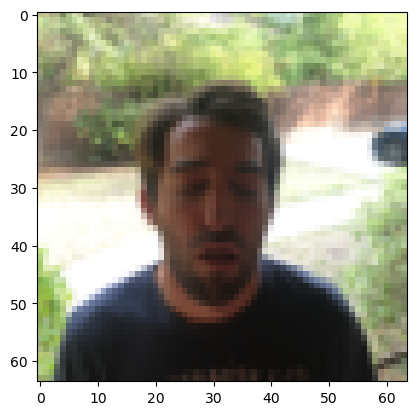

In [13]:
plt.imshow(train_set_x[23])
plt.show()

In [6]:
train_set_y = file['train_set_y'][:]
train_set_y

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,

The function `load_h5_data` is defined to load data and labels from an HDF5 file specified by `h5_file_path`, using the dataset key `key_x` for data and the label key `key_y`. The function returns the loaded data and labels.

In [12]:
def load_h5_data(h5_file_path, key_x, key_y):
    with h5py.File(h5_file_path, 'r') as hf:
        data = hf[key_x][:]  
        labels = hf[key_y][:] 
    return data, labels

Training and test data along with their corresponding labels for happy and sad are loaded using the function `load_h5_data` from the HDF5 files specified by `train_happy_path` and `test_happy_path`.

In [13]:
train_data, train_labels = load_h5_data(train_happy_path, 'train_set_x', 'train_set_y')
test_data, test_labels = load_h5_data(test_happy_path, 'test_set_x', 'test_set_y')

Normalization scales pixel values to a common range (usually [0, 1]), aiding in faster convergence and improved model training by ensuring that features contribute uniformly to the learning process.

In [14]:
# Normalize the data
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

 The `emotion_model` is a Sequential model designed for emotion recognition, featuring the following layers:
 
- Convolutional layer with 32 filters, each of size (3, 3), and ReLU activation.
- MaxPooling layer with a pool size of (2, 2) for spatial down-sampling.
- Dropout layer with a dropout rate of 0.25 to prevent overfitting.
- Flatten layer to convert the multi-dimensional feature maps into a one-dimensional array.
- Dense layer with 64 neurons and ReLU activation, serving as a hidden layer.
- Dropout layer with a dropout rate of 0.5 for additional regularization.
- Dense layer with 1 neuron and sigmoid activation for binary classification.
 
This architecture is tailored for processing 64x64 pixel RGB images (input_shape=(64, 64, 3)) for image classification

This is the emotion model we train to feed the male-female dataset next. We will generate emotion labels for the gender dataset using this emotion model.

In [19]:
emotion_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [20]:
emotion_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Callbacks for Emotion Recognition Model Training
 
Two essential callbacks are implemented during the training of the emotion recognition model:
 
- `ModelCheckpoint`: Saves the best model weights to 'best_emotion_model.h5' based on validation accuracy, ensuring that the model with the highest accuracy on the validation set is preserved.
 
- `EarlyStopping`: Monitors the validation accuracy and stops training if there is no improvement after a patience of 5 epochs, preventing overfitting and optimizing training efficiency.


In [21]:
# Callbacks
checkpoint = ModelCheckpoint('best_emotion_model.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max')

In [22]:
emotion_model.fit(train_data, train_labels, epochs=50, validation_data=(test_data, test_labels), callbacks=[checkpoint, early_stopping])

Epoch 1/50
15/19 [======================>.......] - ETA: 0s - loss: 1.0170 - accuracy: 0.5312
Epoch 1: val_accuracy improved from -inf to 0.61333, saving model to best_emotion_model.h5
19/19 [==============================] - 0s 17ms/step - loss: 0.9564 - accuracy: 0.5333 - val_loss: 0.6678 - val_accuracy: 0.6133
Epoch 2/50
18/19 [===========================>..] - ETA: 0s - loss: 0.6510 - accuracy: 0.6007
Epoch 2: val_accuracy improved from 0.61333 to 0.68667, saving model to best_emotion_model.h5
19/19 [==============================] - 0s 15ms/step - loss: 0.6490 - accuracy: 0.6050 - val_loss: 0.6339 - val_accuracy: 0.6867
Epoch 3/50
16/19 [========================>.....] - ETA: 0s - loss: 0.6126 - accuracy: 0.6855
Epoch 3: val_accuracy did not improve from 0.68667
19/19 [==============================] - 0s 13ms/step - loss: 0.6055 - accuracy: 0.6933 - val_loss: 0.6118 - val_accuracy: 0.6533
Epoch 4/50
17/19 [=========================>....] - ETA: 0s - loss: 0.5641 - accuracy: 0.700

After training, the emotion recognition model achieved a validation loss of 0.1561 and an accuracy of 94.67% on the test dataset.

In [23]:
val_loss, val_accuracy = emotion_model.evaluate(test_data,test_labels)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

5/5 [==============================] - 0s 5ms/step - loss: 0.1561 - accuracy: 0.9467
Validation Loss: 0.1561349630355835, Validation Accuracy: 0.9466666579246521


The model achieved an accuracy of almost 95% on a dataset of 150 samples.
Here, 0 represents sad and 1 represents happy class.

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on validation data
val_predictions = emotion_model.predict(test_data)
val_predictions = (val_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Print classification report
print(classification_report(test_labels, val_predictions))

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, val_predictions)
print(conf_matrix)


5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        66
           1       0.95      0.95      0.95        84

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

[[62  4]
 [ 4 80]]


This heatmap provides a visual representation of the confusion matrix to interpret the model's performance in predicting sad and happy emotions.

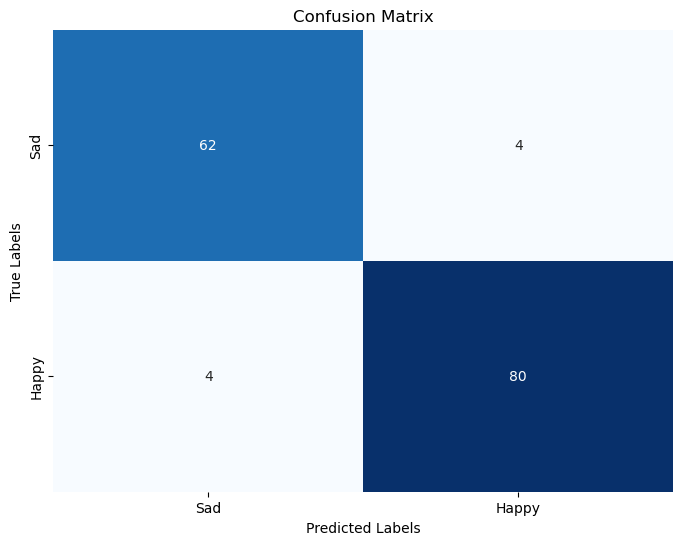

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)

# Adding labels for clarity
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Sad', 'Happy'])
plt.yticks(ticks=[0.5, 1.5], labels=['Sad', 'Happy'])

# Show the plot
plt.show()

In [26]:
emotion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                1968192   
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                      

# Male-female dataset

Reading and loading the male-female dataset and passing it through the above pretrained `emotion-model`, in order to classify the emotions associated with every male and female. 

In [14]:
#Paths to different folder of the dataset 
data_folder_path = '/Users/cherilyogi/Desktop/Class_Folder/INFO_6106/Homework_8'
#emotion_folder_path ='/Users/cherilyogi/Desktop/Class_Folder/INFO_6106/Homework_8/happy'
gender_folder_path = '/Users/cherilyogi/Desktop/Class_Folder/INFO_6106/Homework_8/male-female'

Using the `os.path.join` method to concatenate the abovementioned main folder path with two subdirectories, namely `Training` and `Validation`, which contains the traning and validation datset of males and females.

In [15]:
gender_train_dir = os.path.join(gender_folder_path, 'Training')
gender_validation_dir = os.path.join(gender_folder_path, 'Validation')

In the provided code snippet, an `ImageDataGenerator` is being used for preprocessing images. This is a common technique in the context of deep learning with neural networks, since data augmentation and normalization are essential for effective model training here. The `rescale=1./255` argument indicates that the pixel values of the images should be scaled by a factor of 1/255. This operation normalizes the pixel values to the range [0, 1].

In [16]:
# ImageDataGenerator for preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In this code snippet, the `flow_from_directory` method from the `train_datagen` (ImageDataGenerator for training) is used to generate batches of training data from a directory. Since our dataset is too large isntead of loading the images in one go we are determining the number of samples in each batch that will be processed during each iteration of training and also shuffling the data after each epoch. The same process is also appliced for the Validation dataset using `validation_generator`

In [17]:
train_generator = train_datagen.flow_from_directory(
    gender_train_dir,
    target_size=(64, 64),  
    batch_size=64,
    class_mode='binary',
    shuffle = True) 

Found 47009 images belonging to 2 classes.


In [18]:
validation_generator = validation_datagen.flow_from_directory(
    gender_validation_dir,
    target_size=(64, 64),
    batch_size=64,
    class_mode='binary',
    shuffle = True)

Found 11649 images belonging to 2 classes.


In this code snippet, the validation dataset is processed using a generator `(validation_generator)`, and the images along with their corresponding labels are stored in numpy arrays (`validation_images` and `validation_labels`). This data will be used later on for validation of the final unified model.

In [19]:
#the number of samples in the validation set
num_validation_samples = len(validation_generator.filenames)

#the batch size from the generator
batch_size = validation_generator.batch_size

# Initializing numpy arrays to store images and labels
validation_images = np.zeros((num_validation_samples, 64, 64, 3), dtype=np.float32)
validation_labels = np.zeros((num_validation_samples,), dtype=np.float32)

# Iterating over the validation generator to fill the numpy arrays
for i in range(num_validation_samples // batch_size):
    
    batch = validation_generator.next()
    
   
    images, labels = batch
    
    
    start_idx = i * batch_size
    end_idx = start_idx + batch_size
    validation_images[start_idx:end_idx, :, :, :] = images
    validation_labels[start_idx:end_idx] = labels

# Now, 'validation_images' contains the images, and 'validation_labels' contains the corresponding labels


In [73]:
validation_images.shape

(11649, 64, 64, 3)

In the code snippets below , emotions are predicted on the gender datasetusing `train_generator` and `validation_generator` with the help of pretrained `emotion_model`, and the predictions are then converted from probabilities to binary predictions. 

In [33]:
# Predict emotions on the gender dataset
emotion_predictions = emotion_model.predict(train_generator)

# Convert probabilities to binary predictions
emotion_predictions = (emotion_predictions > 0.5).astype(int)


735/735 [==============================] - 16s 21ms/step


In [83]:
# Predict emotions on the gender dataset
emotion_predictions_val = emotion_model.predict(validation_generator)

# Convert probabilities to binary predictions
emotion_predictions_val = (emotion_predictions_val > 0.5).astype(int)

183/183 [==============================] - 4s 21ms/step


In [75]:
pred = combined_model.predict(validation_images)

365/365 [==============================] - 30s 81ms/step


In this code snippet, data from the gender dataset, including images, gender labels, and emotion predictions, are combined into a single list named `combined_data`. After this loop, `combined_data` contains tuples, each consisting of an image, its corresponding gender label, and the emotion prediction based on the precomputed probabilities.

In [34]:
combined_data = []


for i, (image, gender_label) in enumerate(train_generator):
    #corresponding emotion prediction
    emotion_prediction = emotion_predictions[i]

    # Appending
    combined_data.append((image, gender_label, emotion_prediction))

    # Loop Break condition
    if i == len(train_generator) - 1:
        break


The provided code defines a function `plot_combined_images_with_labels` that takes a list of combined data (consisting of images, gender labels, and emotion predictions) and plots a subset of these images along with their corresponding gender and emotion labels. it can be seen from the images below that out of 5 the model is clearly able to predict 4 of them correctly. So the accuracy of the model is pretty good.

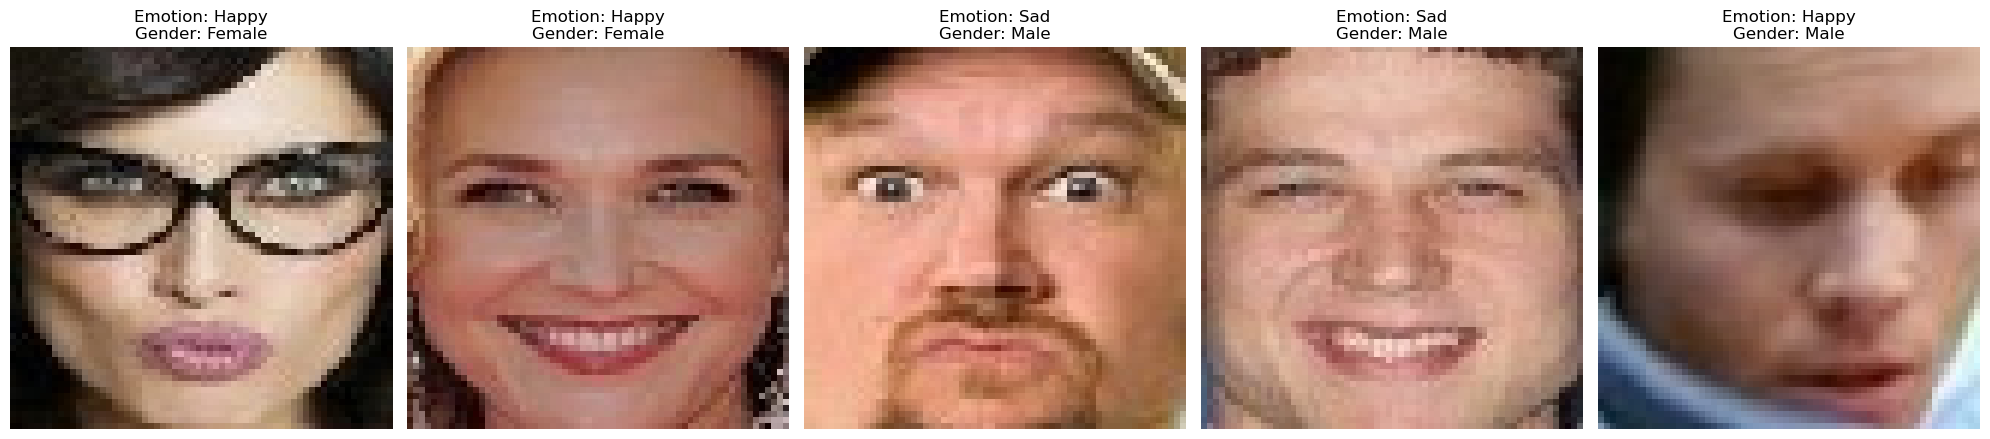

In [35]:
def plot_combined_images_with_labels(data):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    
    for i in range(5):  # Adjust the number of images to display as needed
        image_batch, gender_label_batch, emotion_prediction = data[i]
        ax = axes[i]
        
        # Display the image (since image is a batch, so we take the first element)
        image = image_batch[0]
        ax.imshow(image)
        ax.axis('off')
        
        
        emotion_label = 'Happy' if emotion_prediction == 1 else 'Sad'
        gender_label = 'Male' if gender_label_batch[0] == 1 else 'Female'
        ax.set_title(f'Emotion: {emotion_label}\nGender: {gender_label}')
    
    plt.tight_layout()
    plt.show()


plot_combined_images_with_labels(combined_data)


# Unified Model

Prior to constructing our ultimate unified model, we are examining the sizes of several parameters and rectifying any discrepancies that may exist.

This code iterates through the `combined_data` list, providing details for each sample, including the sample number, image shape, gender label, and the shape of the emotion prediction. An issue emerged during model construction, where it became apparent that all samples up to `sample 734` had a consistent batch size of 64, but `sample 735` had a batch size of 33:

Sample 734:
Image Shape: (64, 64, 64, 3)
Gender Label: [1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1.]
Emotion Prediction Shape: (1,)

Sample 735:
Image Shape: (33, 64, 64, 3)
Gender Label: [0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 1. 1. 1.]
Emotion Prediction Shape: (1,)

In [40]:
for i, (image, gender_label, emotion_prediction) in enumerate(combined_data):
    print(f"Sample {i + 1}:")
    print(f"Image Shape: {image.shape}")
    print(f"Gender Label: {gender_label}")
    print(f"Emotion Prediction Shape: {emotion_prediction.shape}")
    print()


Sample 1:
Image Shape: (64, 64, 64, 3)
Gender Label: [0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.]
Emotion Prediction Shape: (1,)

Sample 2:
Image Shape: (64, 64, 64, 3)
Gender Label: [0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0.]
Emotion Prediction Shape: (1,)

Sample 3:
Image Shape: (64, 64, 64, 3)
Gender Label: [1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
Emotion Prediction Shape: (1,)

Sample 4:
Image Shape: (64, 64, 64, 3)
Gender Label: [1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 

This code prints the emotion predictions for each sample in the `combined_data` list, indicating the sample number along with its corresponding emotion prediction, as we wanted to double-check the emotion prediciton.

In [41]:
for i, (image, gender_label, emotion_prediction) in enumerate(combined_data):
    print(f"Sample {i + 1} Emotion Prediction: {emotion_prediction}")

Sample 1 Emotion Prediction: [1]
Sample 2 Emotion Prediction: [1]
Sample 3 Emotion Prediction: [0]
Sample 4 Emotion Prediction: [0]
Sample 5 Emotion Prediction: [1]
Sample 6 Emotion Prediction: [1]
Sample 7 Emotion Prediction: [1]
Sample 8 Emotion Prediction: [1]
Sample 9 Emotion Prediction: [1]
Sample 10 Emotion Prediction: [1]
Sample 11 Emotion Prediction: [1]
Sample 12 Emotion Prediction: [0]
Sample 13 Emotion Prediction: [0]
Sample 14 Emotion Prediction: [1]
Sample 15 Emotion Prediction: [1]
Sample 16 Emotion Prediction: [1]
Sample 17 Emotion Prediction: [1]
Sample 18 Emotion Prediction: [0]
Sample 19 Emotion Prediction: [1]
Sample 20 Emotion Prediction: [1]
Sample 21 Emotion Prediction: [1]
Sample 22 Emotion Prediction: [1]
Sample 23 Emotion Prediction: [0]
Sample 24 Emotion Prediction: [1]
Sample 25 Emotion Prediction: [1]
Sample 26 Emotion Prediction: [0]
Sample 27 Emotion Prediction: [1]
Sample 28 Emotion Prediction: [1]
Sample 29 Emotion Prediction: [1]
Sample 30 Emotion Predi

In [42]:
# Removing Sample 735 
index_to_remove = 734
 
if index_to_remove < len(combined_data):
    combined_data.pop(index_to_remove)
    print("Element at index 734 removed.")
else:
    print("Index 734 is out of range.")

Element at index 734 removed.


In [43]:
# Checking again the details of the sample 
for i, (image, gender_label, emotion_prediction) in enumerate(combined_data):
    print(f"Sample {i + 1}:")
    print(f"Image Shape: {image.shape}")
    print(f"Gender Label: {gender_label}")
    print(f"Emotion Prediction Shape: {emotion_prediction.shape}")
    print()

Sample 1:
Image Shape: (64, 64, 64, 3)
Gender Label: [0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.]
Emotion Prediction Shape: (1,)

Sample 2:
Image Shape: (64, 64, 64, 3)
Gender Label: [0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0.]
Emotion Prediction Shape: (1,)

Sample 3:
Image Shape: (64, 64, 64, 3)
Gender Label: [1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
Emotion Prediction Shape: (1,)

Sample 4:
Image Shape: (64, 64, 64, 3)
Gender Label: [1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 

In [44]:

import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

This code utilizes list comprehensions to extract and convert the image, gender label, and emotion prediction components from each tuple in `combined_data` into NumPy arrays named `images`, `gender_labels`, and `emotion_predictions`, respectively.

In [45]:
images = np.array([item[0] for item in combined_data])
gender_labels = np.array([item[1] for item in combined_data])
emotion_predictions = np.array([item[2] for item in combined_data])

In [46]:
gender_labels_one_hot = tf.keras.utils.to_categorical(gender_labels, num_classes=2)
emotion_predictions_one_hot = tf.keras.utils.to_categorical(emotion_predictions, num_classes=2)

Another issue we confronted was a disparity in the dimensions following one-hot encoding. Specifically, the shape of the gender labels after one-hot encoding was (734, 64, 2), whereas the shape of the emotion predictions was (734, 2). This inconsistency led to complications in the subsequent stages of the model, introducing errors. To address this, we will harmonize the dimensions by converting the gender labels into the shape (734, 2) as well. This adjustment aims to ensure compatibility and resolve potential errors stemming from the mismatched dimensions during model execution.

In [47]:
gender_labels_one_hot.shape

(734, 64, 2)

In [48]:
emotion_predictions_one_hot.shape

(734, 2)

In [50]:
gender_labels_one_hot_reshaped = gender_labels_one_hot[:, 0, :]

In [52]:
gender_labels_one_hot_reshaped.shape

(734, 2)

In [53]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_gender_train, y_gender_test, y_emotion_train, y_emotion_test = train_test_split(
    images, gender_labels_one_hot_reshaped, emotion_predictions_one_hot, test_size=0.2, random_state=42
)

In [54]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (587, 64, 64, 64, 3)
X_test shape: (147, 64, 64, 64, 3)


The step of resizing the input data from shape (587, 64, 64, 64, 3) to (587, 64, 64, 3) involves removing one dimension from the data. This adjustment is necessary to ensure compatibility with the architecture of the neural network model.

In the unified model the input layer expects input data with a shape of (64, 64, 3), corresponding to images with dimensions 64x64 pixels and 3 color channels (RGB). Therefore, the data needs to be reshaped or resized to match this expected input shape.

The original data shape (587, 64, 64, 64, 3) suggests that there are 587 samples, each with images of dimensions 64x64 pixels and 64 slices or frames (depth) with 3 color channels. Resizing the data to (587, 64, 64, 3) involves retaining the 64x64 pixel dimensions for each image while eliminating the extra dimension related to the slices or frames. 

In [56]:
import cv2

# Resizing training images
X_train_resized = np.array([cv2.resize(image[:, :, 0], (64, 64))[:, :, np.newaxis] for image in X_train])

# Removig singleton dimension
X_train_resized = np.squeeze(X_train_resized, axis=-2)

# Resizing testing images
X_test_resized = np.array([cv2.resize(image[:, :, 0], (64, 64))[:, :, np.newaxis] for image in X_test])

# Removing singleton dimension
X_test_resized = np.squeeze(X_test_resized, axis=-2)

print(f"X_train_resized shape: {X_train_resized.shape}")
print(f"X_test_resized shape: {X_test_resized.shape}")


X_train_resized shape: (587, 64, 64, 3)
X_test_resized shape: (147, 64, 64, 3)


The provided code defines the unified neural network model with two distinct branches for predicting gender and emotion from image data. The code takes the pseudo dataset we created above as the input and traines and classify the happymale, happyfemale, sadmale and sadfemale.

1.` Input Layer`:
    Defines an input layer with a shape of (64, 64, 3), which is suitable for processing 64x64 pixel RGB images.

2. `Gender Branch`:
    Two convolutional layers (Conv2D) with 64 filters of size (3, 3) and ReLU activation, followed by a max-pooling layer (MaxPooling2D) with a pool size of (2, 2).

3. `Emotion Branch`:
    Similar structure to the gender branch, with two convolutional layers and a max-pooling layer.

4. `Merge the Branches`:
    tf.keras.layers.concatenate: Merges the outputs of the gender and emotion branches.
5. `Flatten and Dense Layers`:
    Flatten: Flattens the merged output into a 1D tensor.
    Dense(512, activation='relu'): Adds a dense layer with 512 units and ReLU activation.
    Dropout(0.5): Introduces dropout regularization to prevent overfitting.
6. `Output Layers`:
    Two separate dense layers for gender and emotion predictions:
    Dense(2, activation='sigmoid', name='gender_output'): Outputs gender predictions with a sigmoid activation function.
    Dense(2, activation='sigmoid', name='emotion_output'): Outputs emotion predictions with a sigmoid activation function.
    The number of units in the output layers is set to 2, binary classification for both gender and emotion.
7. `Combined Model`:
    Model(inputs=input_layer, outputs=[gender_output, emotion_output]): Constructs the combined model with the specified input and output layers.
8. `Compilation`:
    combined_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']): Configures the model for training, specifying the Adam optimizer, binary cross-entropy loss (suitable for binary classification), and accuracy as the evaluation metric.
    
This model is designed to take (pseudo dataset)combine_model data images as input and simultaneously predict gender and emotion based on the features learned by the respective branches. The separate output layers allow for independent training and evaluation of each task.

In [58]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D

# Input layer
input_layer = Input(shape=(64, 64, 3), name='input_layer')

# Gender branch
gender_branch = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
gender_branch = Conv2D(64, (3, 3), activation='relu', padding='same')(gender_branch)
gender_branch = MaxPooling2D((2, 2))(gender_branch)
# Add more layers as needed for the gender branch

# Emotion branch
emotion_branch = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
emotion_branch = Conv2D(64, (3, 3), activation='relu', padding='same')(emotion_branch)
emotion_branch = MaxPooling2D((2, 2))(emotion_branch)
# Add more layers as needed for the emotion branch

# Merging the branches
merged = tf.keras.layers.concatenate([gender_branch, emotion_branch])

# Flattening and adding dense layers
merged = Flatten()(merged)
merged = Dense(512, activation='relu')(merged)
merged = Dropout(0.5)(merged)

# Output layers
gender_output = Dense(2, activation='sigmoid', name='gender_output')(merged)
emotion_output = Dense(2, activation='sigmoid', name='emotion_output')(merged)

# Combined model
combined_model = Model(inputs=input_layer, outputs=[gender_output, emotion_output])

# Compiling the model
combined_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
# Callbacks for early stopping 
checkpoint = ModelCheckpoint('best_combined_model.h5', verbose=1, save_best_only=True, monitor='val_gender_output_accuracy', mode='max')
early_stopping = EarlyStopping(monitor='val_gender_output_accuracy', patience=5, verbose=1, mode='max')


In [60]:
combined_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 64, 64, 64)           1792      ['input_layer[0][0]']         
                                                                                                  
 conv2d_4 (Conv2D)           (None, 64, 64, 64)           1792      ['input_layer[0][0]']         
                                                                                                  
 conv2d_3 (Conv2D)           (None, 64, 64, 64)           36928     ['conv2d_2[0][0]']            
                                                                                              

This code trains a model with combined outputs for gender and emotion predictions and incorporates checkpoints and early stopping to monitor and manage the training process.

In conclusion, after training the combined model for 10 epochs, it was observed that the early stopping criterion was triggered. The validation accuracy for the gender output did not show improvement, and the training process halted prematurely. We also got `gender_output_accuracy` of 79 % , `emotion_output_accuracy` of 89% and `val_gender_output_accuracy` of 48% , `val_emotion_output_accuracy` of 83% .

In [62]:
# Training the combined model
combined_model.fit(
    X_train_resized,
    {'gender_output': y_gender_train, 'emotion_output': y_emotion_train},
    epochs=50,
    validation_data=(X_test_resized, {'gender_output': y_gender_test, 'emotion_output': y_emotion_test}),
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/50
19/19 [==============================] - ETA: 0s - loss: 2.6150 - gender_output_loss: 1.5532 - emotion_output_loss: 1.0618 - gender_output_accuracy: 0.4855 - emotion_output_accuracy: 0.8603
Epoch 1: val_gender_output_accuracy improved from -inf to 0.51020, saving model to best_combined_model.h5


/Users/cherilyogi/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 6s 282ms/step - loss: 2.6150 - gender_output_loss: 1.5532 - emotion_output_loss: 1.0618 - gender_output_accuracy: 0.4855 - emotion_output_accuracy: 0.8603 - val_loss: 1.1610 - val_gender_output_loss: 0.7191 - val_emotion_output_loss: 0.4419 - val_gender_output_accuracy: 0.5102 - val_emotion_output_accuracy: 0.8367
Epoch 2/50
19/19 [==============================] - ETA: 0s - loss: 1.0969 - gender_output_loss: 0.6993 - emotion_output_loss: 0.3977 - gender_output_accuracy: 0.5400 - emotion_output_accuracy: 0.8773
Epoch 2: val_gender_output_accuracy did not improve from 0.51020
19/19 [==============================] - 5s 282ms/step - loss: 1.0969 - gender_output_loss: 0.6993 - emotion_output_loss: 0.3977 - gender_output_accuracy: 0.5400 - emotion_output_accuracy: 0.8773 - val_loss: 1.2091 - val_gender_output_loss: 0.7103 - val_emotion_output_loss: 0.4987 - val_gender_output_accuracy: 0.4898 - val_emotion_output_accuracy: 0.8367
Epoch 3/50
19/19 [==

In [86]:
X_test_resized.shape

(147, 64, 64, 3)

This code randomly selects a few images from the test set (`visualized_images`) along with their corresponding gender and emotion labels. It then uses the `visualize_predictions` function to display the images along with the model's predictions for gender and emotion. The predictions are obtained by applying the trained model to the selected images. This visualization provides an intuitive way to assess how well the model is performing on specific examples from the test set.

1/1 [==============================] - 0s 35ms/step


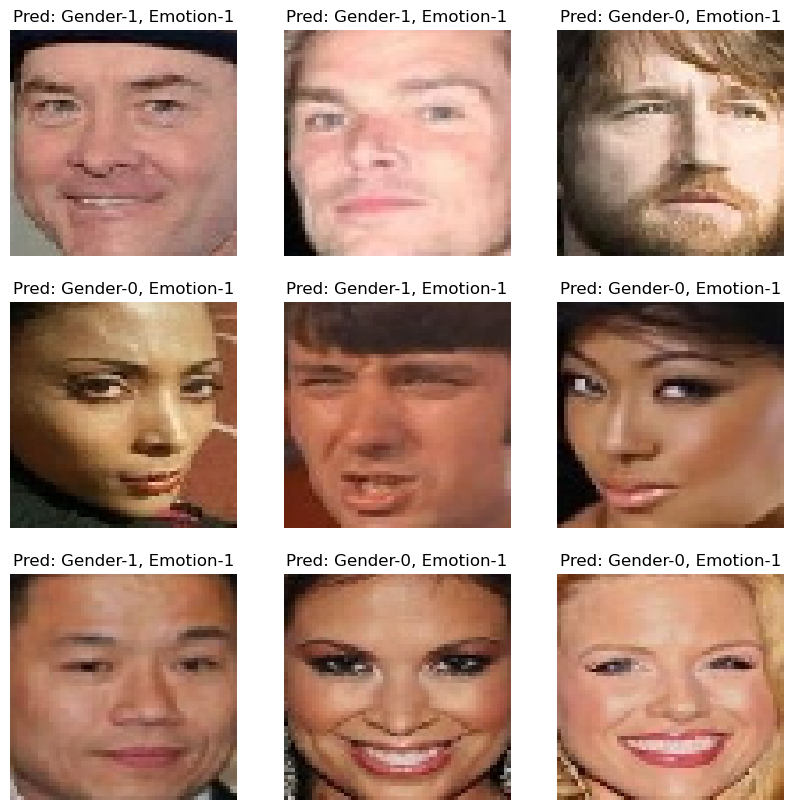

In [101]:
def visualize_predictions(model, images, gender_labels, emotion_labels):
    
    predictions = model.predict(images)

    # Extracting gender and emotion predictions
    gender_predictions, emotion_predictions = predictions

    # Convert one-hot encoded labels back to categorical labels
    gender_labels_categorical = np.argmax(gender_labels, axis=1)
    emotion_labels_categorical = np.argmax(emotion_labels, axis=1)

    # Convert predictions to categorical labels
    gender_predictions_categorical = np.argmax(gender_predictions, axis=1)
    emotion_predictions_categorical = np.argmax(emotion_predictions, axis=1)

    # Plot images with predicted labels
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        pred_label = f"Pred: Gender-{gender_predictions_categorical[i]}, Emotion-{emotion_predictions_categorical[i]}"
        plt.title(f"{pred_label}")
        plt.axis('off')
    plt.show()

# Selecting a few images for visualization
num_visualized_images = 9
visualized_indices = np.random.choice(len(X_test_resized), num_visualized_images, replace=False)
visualized_images = validation_images[visualized_indices]
visualized_gender_labels = y_gender_test[visualized_indices]
visualized_emotion_labels = y_emotion_test[visualized_indices]


visualize_predictions(combined_model, visualized_images, visualized_gender_labels, visualized_emotion_labels)


In conclusion, it is evident that, among the nine images showcased, the model accurately predicted the gender of 8 out of 9 images. However, in terms of emotion prediction, the model achieved accurate identifications for 5 out of the 9 images. The potential discrepancy in emotion prediction may be influenced by the nuanced and subjective nature of facial expressions, posing a challenge for the model to consistently capture and interpret emotional cues. The potential reason for the model's inability to correctly identify some of them could be attributed to alignment variations in the images.